# Evaluation of the `HaGraD`-Optimizer with Mnist-Dataset
---

## Imports and Data-Preparation

In [15]:
## Tensorflow related
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers

## General
import numpy as np
import matplotlib.pyplot as plt

## Hagrad custom optimizer
import sys; 
if "..\\" not in sys.path: sys.path.append("..\\")
from src.hagrad import Hagrad
from src.kinetic_energy_gradients import KineticEnergyGradients

In [16]:
## Fetch Mnist-Dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
assert X_train.shape == (60000, 28, 28)
assert X_test.shape  == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape  == (10000,)

In [17]:
## Class number sanity check
num_classes = 10
assert set(np.unique(y_train)) == set(np.arange(num_classes))

## Normalizing and expanding dimensions for ConvLayers
def normalize_img_data(X: np.ndarray) -> np.ndarray:
    X = X.astype(np.float32) / 255.
    X = np.expand_dims(X, -1)
    return X

X_train = normalize_img_data(X_train)
X_test  = normalize_img_data(X_test)

## convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test  = keras.utils.to_categorical(y_test, num_classes)

---

## Defining the Model

In [18]:
## Using a standard Dense-Model here - sufficient for mnist.
def fully_connected_NN(
    input_shape: tuple,
    num_classes: int,
    optimizer: keras.optimizers.Optimizer,
    print_summary: bool=False) -> keras.Model:

    ## Defining the Model with Sequential API
    model = keras.Sequential([
        layers.Flatten(input_shape=input_shape),
        layers.Dense(128),
        layers.Dense(128),
        layers.Dense(128),
        layers.Dense(num_classes, activation="softmax")
    ])
    
    ## Compiling the Model using the given Optimizer
    model.compile(
        loss=keras.losses.CategoricalCrossentropy(), 
        optimizer=optimizer, 
        metrics=["accuracy"])

    ## Optional: Print Model summary
    if print_summary: print(model.summary())

    return model


---

## Train the Network using different Optimizers

In [19]:
## Settings
batch_size  = 128
epochs      = 50
input_shape = X_train.shape[1:]

In [20]:
## Wrappers
def model_optimizer(optimizer):
    model = fully_connected_NN(
        input_shape=input_shape, 
        num_classes=num_classes, 
        optimizer=optimizer, 
        print_summary=False)
    return model

def model_fit(model, verbose=2):
    fit = model.fit(
        X_train, y_train, 
        batch_size=batch_size, 
        epochs=epochs, 
        validation_data=(X_train, y_train), 
        verbose=verbose)
    return fit

#### Adam

In [21]:
keras.backend.clear_session()
model_adam = model_optimizer(keras.optimizers.Adam())
fit_adam = model_fit(model_adam)

Epoch 1/50
469/469 - 3s - loss: 0.3828 - accuracy: 0.8886 - val_loss: 0.3191 - val_accuracy: 0.9065
Epoch 2/50
469/469 - 2s - loss: 0.3128 - accuracy: 0.9112 - val_loss: 0.2822 - val_accuracy: 0.9197
Epoch 3/50
469/469 - 2s - loss: 0.2994 - accuracy: 0.9151 - val_loss: 0.2817 - val_accuracy: 0.9206
Epoch 4/50
469/469 - 2s - loss: 0.2915 - accuracy: 0.9173 - val_loss: 0.2777 - val_accuracy: 0.9207
Epoch 5/50
469/469 - 2s - loss: 0.2864 - accuracy: 0.9193 - val_loss: 0.2788 - val_accuracy: 0.9198
Epoch 6/50
469/469 - 2s - loss: 0.2824 - accuracy: 0.9216 - val_loss: 0.3009 - val_accuracy: 0.9102
Epoch 7/50
469/469 - 2s - loss: 0.2825 - accuracy: 0.9198 - val_loss: 0.2739 - val_accuracy: 0.9233
Epoch 8/50
469/469 - 2s - loss: 0.2791 - accuracy: 0.9220 - val_loss: 0.2646 - val_accuracy: 0.9240
Epoch 9/50
469/469 - 2s - loss: 0.2738 - accuracy: 0.9236 - val_loss: 0.2618 - val_accuracy: 0.9252
Epoch 10/50
469/469 - 2s - loss: 0.2725 - accuracy: 0.9228 - val_loss: 0.2612 - val_accuracy: 0.9256

### SGD

In [22]:
keras.backend.clear_session()
model_sgd = model_optimizer(keras.optimizers.SGD())
fit_sgd = model_fit(model_sgd)

Epoch 1/50
469/469 - 3s - loss: 0.7559 - accuracy: 0.7968 - val_loss: 0.4372 - val_accuracy: 0.8771
Epoch 2/50
469/469 - 2s - loss: 0.3953 - accuracy: 0.8867 - val_loss: 0.3653 - val_accuracy: 0.8946
Epoch 3/50
469/469 - 2s - loss: 0.3511 - accuracy: 0.8989 - val_loss: 0.3360 - val_accuracy: 0.9031
Epoch 4/50
469/469 - 2s - loss: 0.3299 - accuracy: 0.9056 - val_loss: 0.3232 - val_accuracy: 0.9072
Epoch 5/50
469/469 - 2s - loss: 0.3173 - accuracy: 0.9087 - val_loss: 0.3100 - val_accuracy: 0.9108
Epoch 6/50
469/469 - 2s - loss: 0.3081 - accuracy: 0.9124 - val_loss: 0.3030 - val_accuracy: 0.9138
Epoch 7/50
469/469 - 2s - loss: 0.3015 - accuracy: 0.9147 - val_loss: 0.2962 - val_accuracy: 0.9154
Epoch 8/50
469/469 - 2s - loss: 0.2959 - accuracy: 0.9162 - val_loss: 0.2906 - val_accuracy: 0.9168
Epoch 9/50
469/469 - 2s - loss: 0.2918 - accuracy: 0.9172 - val_loss: 0.2863 - val_accuracy: 0.9189
Epoch 10/50
469/469 - 2s - loss: 0.2879 - accuracy: 0.9189 - val_loss: 0.2857 - val_accuracy: 0.9183

### HaGraD

In [23]:
keras.backend.clear_session()
hagrad_optimizer = Hagrad()
print(hagrad_optimizer.get_config())
model_hagrad = model_optimizer(hagrad_optimizer)
fit_hagrad = model_fit(model_hagrad)

{'name': 'hagrad', 'epsilon': 1.0, 'gamma': 10.0, 'delta': 0.09090909090909091, 'kinetic_energy_gradient': 'Relativistic kinetic energy sqrt( ||p||^2 + 1 )-1 with gradient p/sqrt( ||p||^2 + 1 )'}
Epoch 1/50
469/469 - 3s - loss: 0.4225 - accuracy: 0.8768 - val_loss: 0.3149 - val_accuracy: 0.9104
Epoch 2/50
469/469 - 3s - loss: 0.3150 - accuracy: 0.9101 - val_loss: 0.3220 - val_accuracy: 0.9059
Epoch 3/50
469/469 - 3s - loss: 0.3024 - accuracy: 0.9134 - val_loss: 0.2874 - val_accuracy: 0.9178
Epoch 4/50
469/469 - 3s - loss: 0.2938 - accuracy: 0.9167 - val_loss: 0.2861 - val_accuracy: 0.9193
Epoch 5/50
469/469 - 3s - loss: 0.2905 - accuracy: 0.9174 - val_loss: 0.2787 - val_accuracy: 0.9202
Epoch 6/50
469/469 - 3s - loss: 0.2864 - accuracy: 0.9199 - val_loss: 0.2698 - val_accuracy: 0.9259
Epoch 7/50
469/469 - 3s - loss: 0.2837 - accuracy: 0.9203 - val_loss: 0.2766 - val_accuracy: 0.9229
Epoch 8/50
469/469 - 3s - loss: 0.2802 - accuracy: 0.9213 - val_loss: 0.2809 - val_accuracy: 0.9171
Epoc

---

## Visualizing

Keras is evaluating the validation error at the end of each epoch. Therefore teh validation errors get shifted for the visualization:

In [24]:
epochs_arr = np.arange(epochs)
epochs_arr_val = epochs_arr + 1

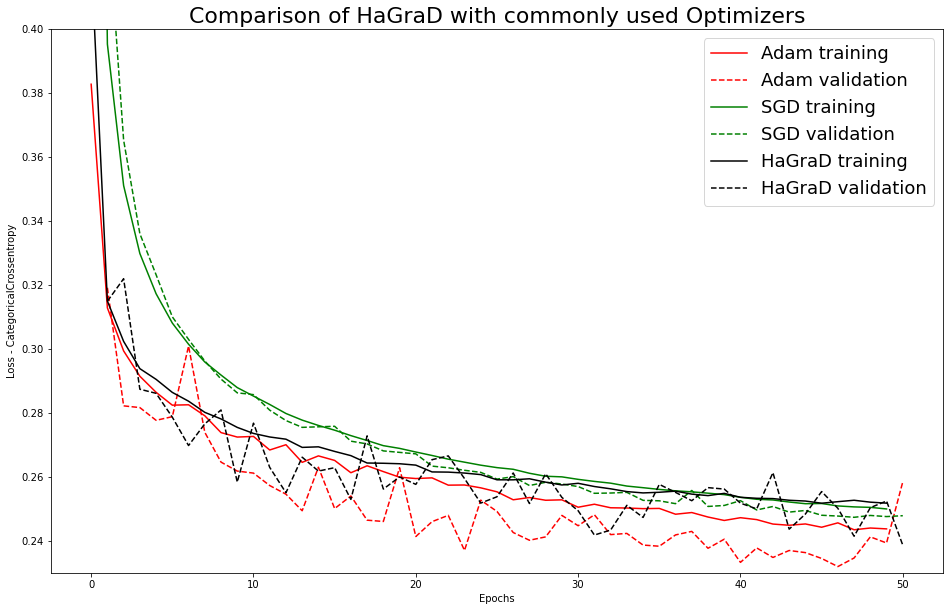

In [25]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.set_title("Comparison of HaGraD with commonly used Optimizers", fontsize=22)
ax.plot(epochs_arr,     fit_adam.history['loss'],       "r-",  label="Adam training") 
ax.plot(epochs_arr_val, fit_adam.history['val_loss'],   "r--", label="Adam validation") 
ax.plot(epochs_arr,     fit_sgd.history['loss'],        "g-",  label="SGD training") 
ax.plot(epochs_arr_val, fit_sgd.history['val_loss'],    "g--", label="SGD validation") 
ax.plot(epochs_arr,     fit_hagrad.history['loss'],     "k-",  label="HaGraD training") 
ax.plot(epochs_arr_val, fit_hagrad.history['val_loss'], "k--", label="HaGraD validation") 
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss - CategoricalCrossentropy")
ax.set_ylim(bottom=0.23, top=0.4)
leg = ax.legend(frameon=True, fontsize=18)
plt.show()
plt.close()

---